In [1]:
import pandas as pd
import numpy as np
import shapely
import fiona
from shapely import geometry
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely.geometry import Point
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import mplleaflet as mpl
import pysal as ps


In [2]:
bos_geo_parcel = gpd.read_file('/Users/DavidStier/Downloads/Parcels_2016_Data_Full/Parcels_2016_Data_Full.shp')

In [3]:
bos_geo_parcel.shape

(166248, 64)

In [4]:
bos_geo_parcel.crs

{'init': u'epsg:4326'}

In [5]:
mini = bos_geo_parcel.ix[0:2000]

In [6]:
mini_mario = bos_geo_parcel.head(1500)
print mini_mario.shape
print mini_mario.info()

(1500, 64)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 64 columns):
AV_BLDG       1500 non-null int64
AV_LAND       1500 non-null int64
AV_TOTAL      1500 non-null int64
CM_ID         185 non-null object
EGIS_WM_db    1500 non-null int64
FULL_ADDRE    1500 non-null object
GIS_ID        1500 non-null object
GROSS_AREA    1491 non-null object
GROSS_TAX     1500 non-null float64
LAND_SF       1498 non-null object
LIVING_ARE    1491 non-null object
LU            1500 non-null object
MAIL_ADDRE    1500 non-null object
MAIL_ADD_1    744 non-null object
MAIL_CS       1500 non-null object
MAIL_ZIPCO    1500 non-null object
NUM_FLOORS    1323 non-null float64
OBJECTID      1500 non-null int64
OWNER         1500 non-null object
OWN_OCC       1500 non-null object
PID           1500 non-null object
PID_LONG      1500 non-null object
PTYPE         1500 non-null int64
R_AC          979 non-null object
R_BDRMS       979 non-null object
R_BLDG_

In [7]:
import pickle
pickle.dump( mini_mario, open( "save.p", "wb" ) )

In [8]:
import cPickle
f = open('mini_mario.save', 'wb')
cPickle.dump(mini_mario,f)
f.close()

In [9]:
type(mini)

geopandas.geodataframe.GeoDataFrame

In [10]:
mini.head(3).T

,0,1,2
AV_BLDG,235300,281200,244700
AV_LAND,129900,121000,121400
AV_TOTAL,365200,402200,366100
CM_ID,None,None,None
EGIS_WM_db,147,341,799
FULL_ADDRE,"104 A 104 PUTNAM ST, 02128","197 LEXINGTON ST, 02128","199 LEXINGTON ST, 02128"
GIS_ID,0100001000,0100002000,0100003000
GROSS_AREA,3353,3299,3392
GROSS_TAX,4017.2,4424.2,4027.1
LAND_SF,1150,1150,1150


In [11]:
type(mini['NUM_FLOORS'])

pandas.core.series.Series

In [12]:
mini.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 64 columns):
AV_BLDG       2001 non-null int64
AV_LAND       2001 non-null int64
AV_TOTAL      2001 non-null int64
CM_ID         280 non-null object
EGIS_WM_db    2001 non-null int64
FULL_ADDRE    2001 non-null object
GIS_ID        2001 non-null object
GROSS_AREA    1991 non-null object
GROSS_TAX     2001 non-null float64
LAND_SF       1998 non-null object
LIVING_ARE    1991 non-null object
LU            2001 non-null object
MAIL_ADDRE    2001 non-null object
MAIL_ADD_1    996 non-null object
MAIL_CS       2001 non-null object
MAIL_ZIPCO    2001 non-null object
NUM_FLOORS    1776 non-null float64
OBJECTID      2001 non-null int64
OWNER         2001 non-null object
OWN_OCC       2001 non-null object
PID           2001 non-null object
PID_LONG      2001 non-null object
PTYPE         2001 non-null int64
R_AC          1277 non-null object
R_BDRMS       1277 non-null object
R_BLDG_STY    12

In [13]:
mini.AV_BLDG.isnull().sum()

0

In [14]:
mini['AV_BLDG'].plot()
mpl.show()

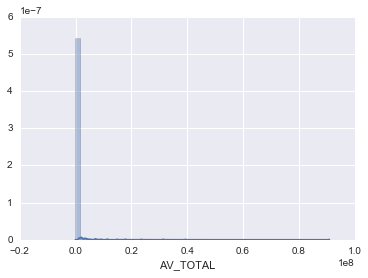

In [15]:
sb.distplot( mini['AV_TOTAL'].astype(np.float) )

In [16]:
mini.geometry.head(4)

0    POLYGON ((-71.03250248712089 42.37932830253219...
1    POLYGON ((-71.03243830112275 42.37935259073267...
2    POLYGON ((-71.03237277765422 42.37937867744286...
3    POLYGON ((-71.03230747757723 42.37940305657987...
Name: geometry, dtype: object

In [17]:
mini.crs

{'init': u'epsg:4326'}

In [31]:
# import mplleaflet

f = plt.figure(figsize=(15, 8))
ax = f.gca()
mini[0:11].plot(ax=ax)
mpl.display(fig=f)

In [22]:
from shapely.ops import cascaded_union
len(mini.geometry)

2001

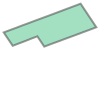

In [29]:
polygons12 = mini['geometry'][0:11]
cascaded_union(polygons12)


In [30]:
mini['geometry'][0:11]

0     POLYGON ((-71.03250248712089 42.37932830253219...
1     POLYGON ((-71.03243830112275 42.37935259073267...
2     POLYGON ((-71.03237277765422 42.37937867744286...
3     POLYGON ((-71.03230747757723 42.37940305657987...
4     POLYGON ((-71.03240302352147 42.379545262324, ...
5     POLYGON ((-71.0320829234914 42.37934767768595,...
6     POLYGON ((-71.0320055411844 42.37937675595821,...
7     POLYGON ((-71.03192072382784 42.37940756189711...
8     POLYGON ((-71.03183761326828 42.37943869189135...
9     POLYGON ((-71.03175230244833 42.37947041068519...
10    POLYGON ((-71.03167011493099 42.37950117375457...
Name: geometry, dtype: object

In [19]:
import folium
import csv
from folium import plugins



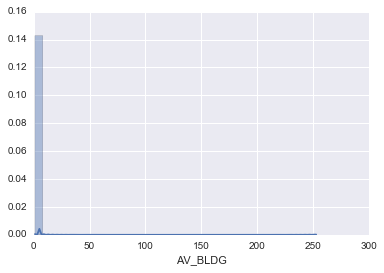

In [20]:
mini_vs = mini['AV_BLDG'].value_counts()
sb.distplot(mini_vs)


AttributeError: ("'Polygon' object has no attribute 'x'", u'occurred at index 0')

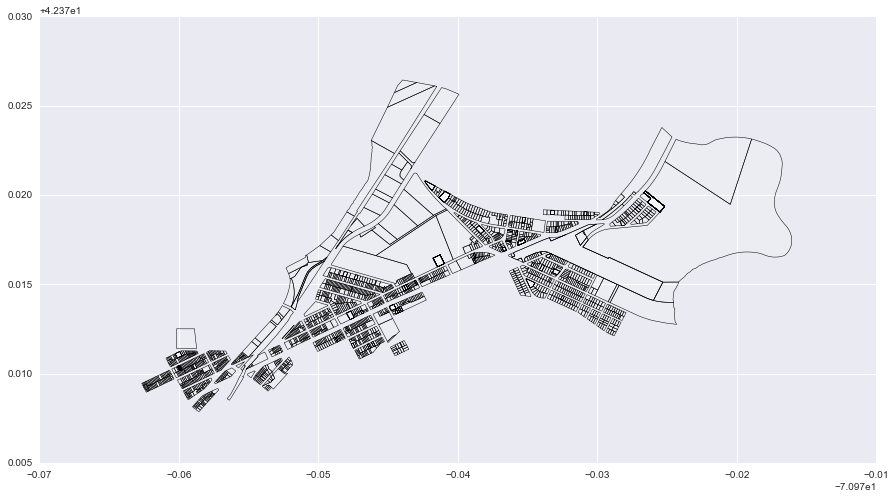

In [21]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()

mini.plot(ax=ax, alpha=0.1, linewidth=0.5, color='white')
sb.kdeplot(data=mini.apply(lambda srs: pd.Series({'x': srs.geometry.x, 'y': srs.geometry.y}), axis='columns'), ax=ax,
            alpha=1)
ax.set_axis_off()
mpl.show()

In [ ]:
mini.shape

In [ ]:
mini.geometry[4506]